In [ ]:
# kết nối với gg drive
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/NLP 4+1/Cuối kỳ/dataset/')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/NLP 4+1/Cuối kỳ/dataset'

# 1. Import các thư viện cần thiết

In [ ]:
!pip install pyvi --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.6 MB/s eta 0:00:00


In [ ]:
import re
import json
import pandas as pd
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load dữ liệu

In [ ]:
df = pd.read_csv('chatbot-data.csv')
df

,questions,answers
0,Thích mẫu người nào,"Dễ thương, tóc dài, da trắng"
1,Có crush ai không,Có 1 bạn cùng lớp
2,Tại sao lại thích bạn dó,Vì đáp ứng những yêu cầu của tao
3,Có hay nói chuyện không,Hay nhắn tin messenger
4,Bạn kia có bắt chuyện trước không,Có đôi khi
...,...,...
11517,Học quốc phòng ở TDTU cói vui không ?,Rất vui là đằng khác
11518,Yêu cầu bằng TA của trường như thế nào ?,Tuỳ mỗi khoá sẽ có các yêu cầu đầu ra ...
11519,Trường nhận những loại bằng TA nào ?,Trường nhận hầu hết các chứng chỉ TA qu...
11520,trường có phát người yêu không ?,Cái đó tuỳ vào bạn nữa


In [ ]:
df.isna().sum()

questions    0
answers      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# 3. Tiền xử lý dữ liệu

In [ ]:
def preprocess(text):
    text = text.lower()                                                 # chuyển về chữ thường
    text = re.sub(r'[!“”"’#$%&\()*+,./:;<=>?@[\]^_`{|}~]', "", text)    # loại bỏ kí tự đặt biệt
    text = ViTokenizer.tokenize(text)                                   # word segmentation
    return text

preprocess('Chương trình,     thạc sĩ ở TDTU có tốt     không?    ')

'chương_trình thạc_sĩ ở tdtu có tốt không'

In [ ]:
df['question_preprocess'] = df['questions'].apply(preprocess)
df['answer_preprocess'] = df['answers'].apply(preprocess)
df.head(2)

,questions,answers,question_preprocess,answer_preprocess
0,Thích mẫu người nào,"Dễ thương, tóc dài, da trắng",thích mẫu người nào,dễ_thương tóc dài da trắng
1,Có crush ai không,Có 1 bạn cùng lớp,có crush ai không,có 1 bạn cùng lớp


In [ ]:
#finding the lens of preprocessed questions and answers
df['question_len'] = df['question_preprocess'].apply(lambda x: len(x.split()))
df['answer_len'] = df['answer_preprocess'].apply(lambda x: len(x.split()))
df.head(2)

,questions,answers,question_preprocess,answer_preprocess,question_len,answer_len
0,Thích mẫu người nào,"Dễ thương, tóc dài, da trắng",thích mẫu người nào,dễ_thương tóc dài da trắng,4,5
1,Có crush ai không,Có 1 bạn cùng lớp,có crush ai không,có 1 bạn cùng lớp,4,5


# 4. Phân tích

Text(0.5, 1.0, 'answer_len counts')

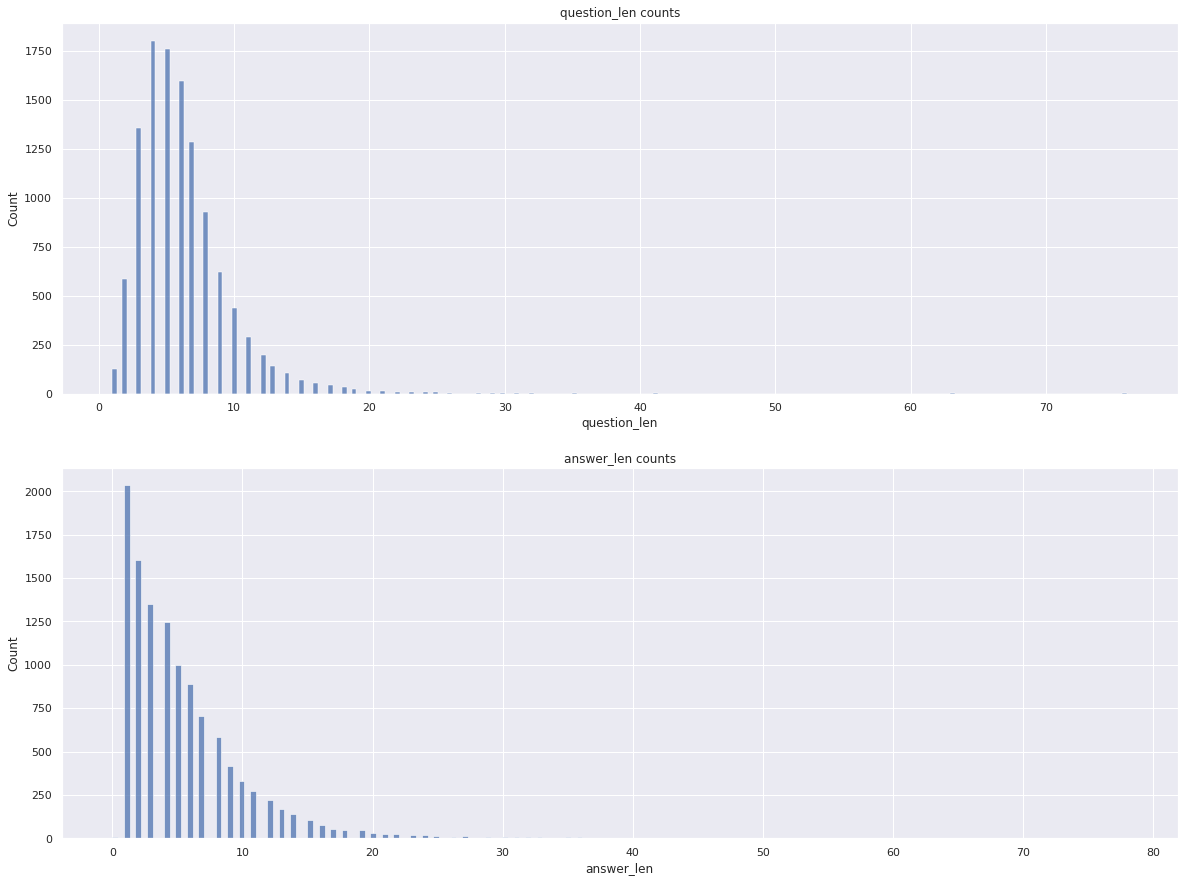

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15)})
fig, (ax1, ax2) = plt.subplots(2,1)

sns.histplot(df['question_len'], ax = ax1)
ax1.set_title("question_len counts")

sns.histplot(df['answer_len'], ax= ax2)
ax2.set_title("answer_len counts")

## 4.1 Question

<Axes: >

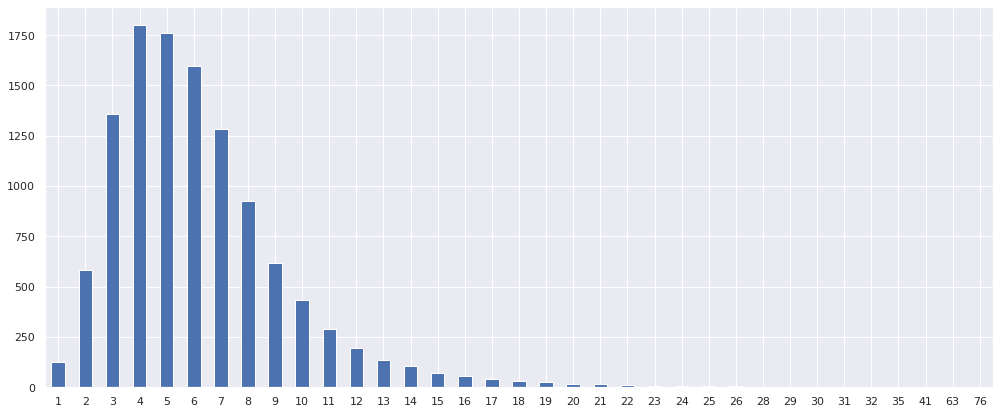

In [ ]:
g_ques = df['question_len'].value_counts().sort_index()
g_ques.plot(kind='bar', figsize=(17,7), rot=0)

In [ ]:
df['question_len'].describe()

count    11522.000000
mean         6.232078
std          3.506729
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         76.000000
Name: question_len, dtype: float64

## 4.2 Answer

<Axes: >

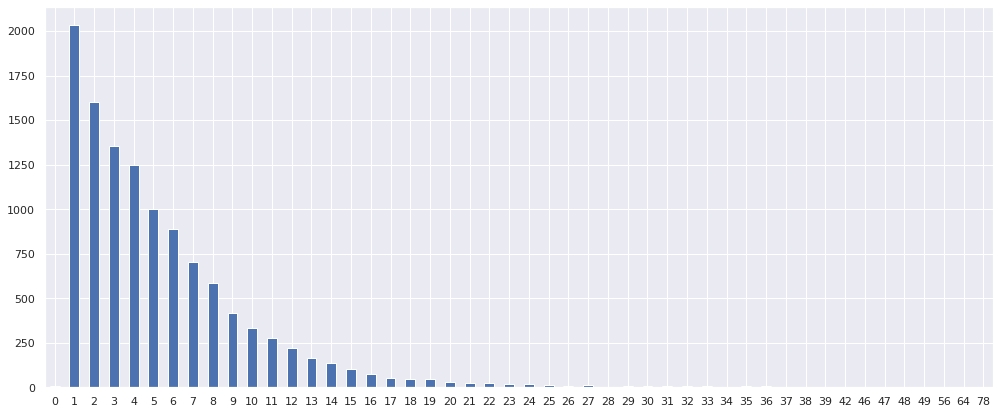

In [ ]:
g_ans = df['answer_len'].value_counts().sort_index()
g_ans.plot(kind='bar', figsize=(17,7), rot=0)

In [ ]:
df['answer_len'].describe()

count    11522.000000
mean         5.434126
std          5.013327
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         78.000000
Name: answer_len, dtype: float64

## 4.3 Question & Answer

In [ ]:
#printing different percentiles of question and answer lengths
import numpy as np
print('%\t ques\t ans')
for i in range(0,90,10):
    print(i,'\t',int(np.percentile(df['question_len'],i)), '\t', int(np.percentile(df['answer_len'],i)))
for i in range(90,101,1):
    print(i,'\t',int(np.percentile(df['question_len'],i)), '\t', int(np.percentile(df['answer_len'],i)))

%	 ques	 ans
0 	 1 	 0
10 	 3 	 1
20 	 4 	 2
30 	 4 	 2
40 	 5 	 3
50 	 6 	 4
60 	 6 	 5
70 	 7 	 6
80 	 8 	 8
90 	 10 	 11
91 	 10 	 12
92 	 11 	 12
93 	 11 	 13
94 	 12 	 13
95 	 12 	 14
96 	 13 	 15
97 	 14 	 17
98 	 16 	 19
99 	 18 	 24
100 	 76 	 78


In [ ]:
df[df['question_len'] == 1]

,questions,answers,question_preprocess,answer_preprocess,question_len,answer_len
187,thành phố?,Hồ Chí Minh,thành_phố,hồ chí minh,1,3
200,thành phố?,hồ chí minh,thành_phố,hồ chí minh,1,3
363,Quê quán?,Thái Bình,quê_quán,thái_bình,1,1
372,Địa chỉ?,Kha Vạn Cân.,địa_chỉ,kha vạn_cân,1,2
373,Địa chỉ?,Gò Vấp.,địa_chỉ,gò_vấp,1,1
...,...,...,...,...,...,...
11179,ví dụ,suối tiên đó,ví_dụ,suối tiên đó,1,3
11310,hello,gì á,hello,gì á,1,2
11311,alo,nghe nè,alo,nghe nè,1,2
11312,hi,hello,hi,hello,1,1


In [ ]:
df[df['answer_len'] == 0]

,questions,answers,question_preprocess,answer_preprocess,question_len,answer_len
4361,Hình tròn có bao nhiêu góc vuông ?,?????,hình_tròn có bao_nhiêu góc_vuông,,4,0
4362,Vũ trụ có hình gì ?,???????????,vũ_trụ có hình gì,,4,0
4402,Hình tròn có 4 góc vuông là hình gì?,?,hình_tròn có 4 góc_vuông là hình gì,,7,0
5174,Tui đang lo cho mấy ông hơn á,:)),tui đang lo cho mấy ông hơn á,,8,0
10440,này là cái gì vậy,?,này là cái gì vậy,,5,0


In [ ]:
df[df['answer_len'] == 1].head()

,questions,answers,question_preprocess,answer_preprocess,question_len,answer_len
11,mày thích chơi bi lắc không?,có,mày thích chơi bi_lắc không,có,5,1
13,mày chơi cầu công hay cầu thủ?,thủ,mày chơi cầu công hay cầu_thủ,thủ,6,1
15,hay chơi với ai?,Đồng nghiệp,hay chơi với ai,đồng_nghiệp,4,1
18,thích phim nào?,quái vật,thích phim nào,quái_vật,3,1
20,thích hãng phim nào?,marvel,thích hãng phim nào,marvel,4,1


# 5. Tách dữ liệu với Question(maxlen = 15) & Answer(maxlen = 15)

In [ ]:
df_new = df[(df['question_len'] > 0) & (df['question_len'] <= 15) & (df['answer_len'] > 0) & (df['answer_len'] <= 15)].reset_index(drop=True)
df_new

,questions,answers,question_preprocess,answer_preprocess,question_len,answer_len
0,Thích mẫu người nào,"Dễ thương, tóc dài, da trắng",thích mẫu người nào,dễ_thương tóc dài da trắng,4,5
1,Có crush ai không,Có 1 bạn cùng lớp,có crush ai không,có 1 bạn cùng lớp,4,5
2,Tại sao lại thích bạn dó,Vì đáp ứng những yêu cầu của tao,tại_sao lại thích bạn dó,vì đáp_ứng những yêu_cầu của tao,5,6
3,Có hay nói chuyện không,Hay nhắn tin messenger,có hay nói_chuyện không,hay nhắn_tin messenger,4,3
4,Bạn kia có bắt chuyện trước không,Có đôi khi,bạn kia có bắt_chuyện trước không,có đôi_khi,6,2
...,...,...,...,...,...,...
10893,Học quốc phòng ở TDTU cói vui không ?,Rất vui là đằng khác,học quốc_phòng ở tdtu cói vui không,rất vui là đằng khác,7,5
10894,Yêu cầu bằng TA của trường như thế nào ?,Tuỳ mỗi khoá sẽ có các yêu cầu đầu ra ...,yêu_cầu bằng ta của trường như thế_nào,tuỳ mỗi khoá sẽ có các yêu_cầu đầu_ra khác nhau,7,10
10895,Trường nhận những loại bằng TA nào ?,Trường nhận hầu hết các chứng chỉ TA qu...,trường nhận những loại bằng ta nào,trường nhận hầu_hết các chứng_chỉ ta quốc_tế n...,7,12
10896,trường có phát người yêu không ?,Cái đó tuỳ vào bạn nữa,trường có phát người_yêu không,cái đó tuỳ vào bạn nữa,5,6


In [ ]:
df_new = df_new[['question_preprocess', 'answer_preprocess']]
df_new = df_new.rename(columns={'question_preprocess': 'question', 'answer_preprocess': 'answer'})
df_new.head(2)

,question,answer
0,thích mẫu người nào,dễ_thương tóc dài da trắng
1,có crush ai không,có 1 bạn cùng lớp


In [ ]:
# chia dữ liệu thành train, test
df_train, df_test = train_test_split(df_new, test_size= 150, random_state=42, shuffle=True)

# lưu dữ liệu
df_train.to_csv('./train.csv', index=False)
df_test.to_csv('./test.csv', index=False)

print(len(df_train), len(df_test))
df_train

10748 150


,question,answer
1281,có thưởng tết không,có
360,quê mày ở đâu,đà_nẵng
8988,bạn thích chơi môn thể_thao nào,mình thích chơi bóng_đá
10469,gia_đình cậu có sống ở thành_phố hồ chí minh k...,gia_đình tớ đang ở cùng tớ
6398,nếu có người_yêu thì việc đầu_tiên bạn làm là gì,mình sẽ dẫn người_yêu đi xem phim
...,...,...
5734,xung quang trọ bạn như thế_nào,nhiều của hàng tiện_lợi nhưng không có chợ
5191,khi nào đi đá cậu rủ tớ tham_gia được không,được á tớ sẽ mời cậu tham_gia chơi chung cho vui
5390,bạn tên gì vậy,mình tên vũ
860,lương cao không,không cao lắm
